# Pseudorapidity

In this exercise, you will study how the pseudorapidity values of muons that are detected in the CMS detector affect the invariant mass distribution.

Pseudorapidity $\eta$ describes the angle $\theta$ between the detected particle and the particle beam (z-axis in Figure 1). As a function of $\theta$ (in radians), pseudorapidity is defined as

$$
\eta = -\ln(\tan(\frac{\theta}{2})).
$$

Pseudorapidity ranges from 0 to infinity. From Figure 1, we can see that small values of pseudorapidity means that the path of the particle differs more from the particle beam. Similarly, large pseudorapidity value means that the particle has continued almost among the beam line after the collision. In other words, when $\theta\longrightarrow0$, $\eta\longrightarrow\infty$ and when $\theta\longrightarrow90^\circ$, $\eta\longrightarrow0$.

<figure>
    <img src="../images/CMSangles.png" alt="image missing" style="height: 300px" />
    <figcaption>Figure 1: Quantities $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption>
</figure>

Figure 2 shows a situation where two particle beams collide. Two muons with different pseudorapidities are produced in this collision (represented as dashed lines). The muon with smaller pseudorapidity hits the barrel part of the detector whereas the muon with greater pseudorapidity hits the endcap of the detector. 

<figure>
    <img src="../images/pseudorapidities.png" alt="image missing" style="height: 300px" />
    <figcaption>Figure 2: Two particles with different pseudorapidities in the CMS detector.</figcaption>
</figure>

# Exercises

Your task is to draw two histograms. One shows muon pairs with small pseudorapidities and the other shows muon pairs with large pseudorapidities. We can then compare those histograms to see how pseudorapidity affects the mass distributions.

## Part 1 - Pseudorapidity as a function of $\theta$

In order to see better how pseudorapidity $\eta$ and the angle $\theta$ are related, we can plot $\eta$ as a function of $\theta$. Write a function **pseudorapidity(theta)** that takes the **angle theta in degrees** as a parameter and **returns** the **pseudorapidity** (remember to convert the degrees to radians inside the function). Then use your function to plot the pseudorapidity for $\theta \in \mathopen[1^{\circ},179^{\circ}\mathclose]$. 

<br>

$\color{red}{\text{Write the code below}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pseudorapidity(theta):
    # argument theta in degrees
    theta = np.radians(theta)
    return -np.log(np.tan(theta/2))

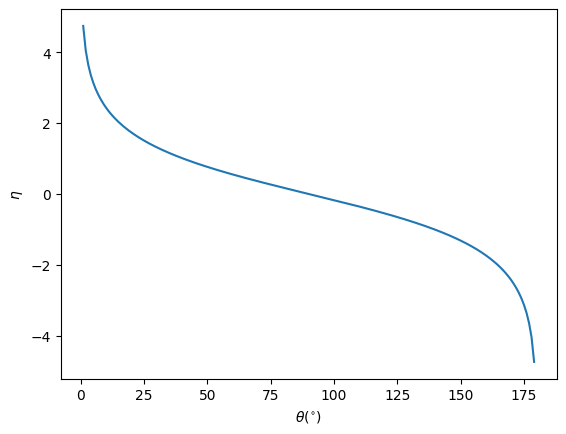

In [2]:
# Plot pseudorapidity for theta=[1,179] degrees.

theta = np.linspace(1,179,179)
plt.figure()
plt.plot(theta,pseudorapidity(theta))
plt.xlabel(r'$\theta (^{\circ})$')
plt.ylabel(r'$\eta$')
plt.show()

In [3]:
print(round(pseudorapidity(1),2))
print(round(pseudorapidity(10),2))
print(round(pseudorapidity(45),2))
print(round(pseudorapidity(80),2))


4.74
2.44
0.88
0.18


## Part 2 - selecting events from data

Your task is to divide the dataset 'DoubleMuRun2011A.csv' to events where both of the muons have small pseudorapidity and large pseudorapidity. Use events where muons have smaller pseudorapidity than 0.38 for small pseudorapidities and larger than 1.52 for large pseudorapidities. Save your datasets to variables 'small_etas' and 'large_etas'.

Note that $\eta$ can also be negative so remember to take the absolute value.

<br>

$\color{red}{\text{Write the code below}}$

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

dataset = pd.read_csv('DoubleMuRun2011A.csv')

lower_limit = 0.38
upper_limit = 1.52
large_etas = dataset[(abs(dataset.eta1) > upper_limit) & (abs(dataset.eta2) > upper_limit)]
small_etas = dataset[(abs(dataset.eta1) < lower_limit) & (abs(dataset.eta2) < lower_limit)]

print('Amount of all events = %d' % len(dataset))
print('Amount of the events where the pseudorapidity of the both muons have been large: %d' %len(large_etas))
print('Amount of the events where the pseudorapidity of the both muons have been small: %d' %len(small_etas))

print(len(large_etas[(abs(large_etas.M) > 60) & (abs(large_etas.M) < 120)]))
print(len(small_etas[(abs(small_etas.M) > 60) & (abs(small_etas.M) < 120)]))


Amount of all events = 475465
Amount of the events where the pseudorapidity of the both muons have been large: 34263
Amount of the events where the pseudorapidity of the both muons have been small: 34337
2037
1411


## Part 3 - Plotting the histograms


Next, make histograms to compare the datasets containing small pseudorapidities and large pseudorapidities. Just like in previous exercises, we are interested in a single peak. Consider the mass range of a Z boson.

For your range of invariant masses:
1. Create distinct invariant mass histograms for both large and small eta datasets. Use 100 bins each.
1. Fit Breit-Wigner distribution to both histograms
1. Consider how pseudorapidity affects the mass distribution (consider for example the decay width and lifetime of the particle)

<br>

$\color{red}{\text{Write the code below}}$

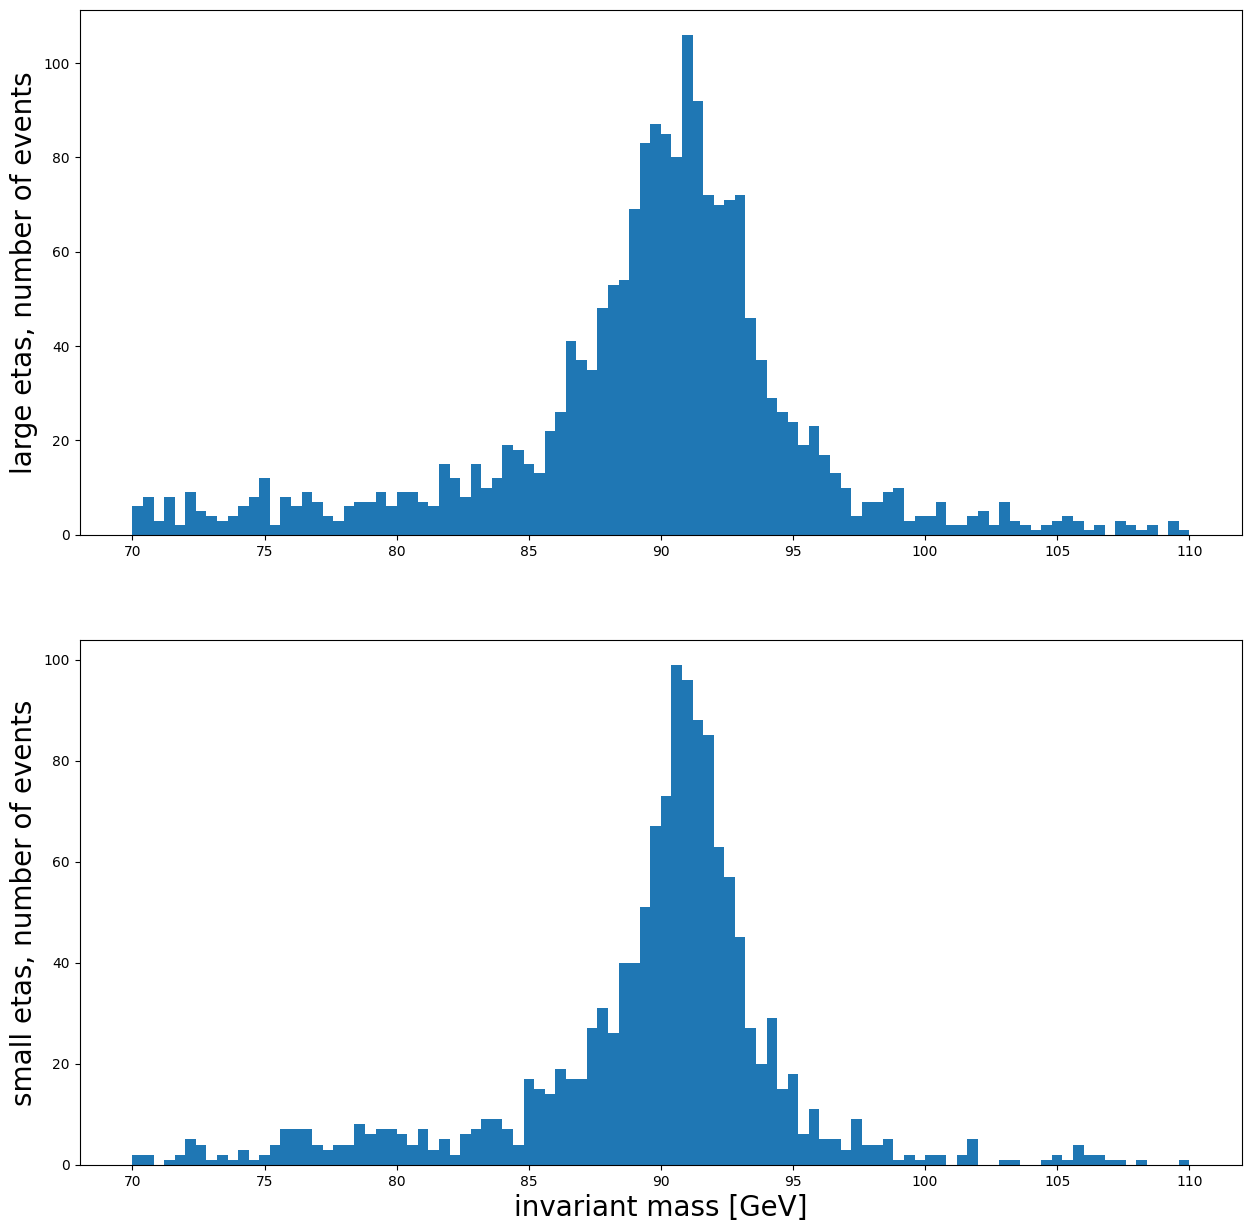

In [5]:
# define bins, limits and variables containing invariant masses
inv_mass_large = large_etas['M']
inv_mass_small = small_etas['M']
bins = 100
limits = (70,110)

# plot both histograms using subplots
f = plt.figure(figsize=(15,15))
plt.subplot(211)
hist_large, bins_large, _ = plt.hist(inv_mass_large, bins=bins, range=limits)
plt.ylabel('large etas, number of events', fontsize=20)
plt.subplot(212)
hist_small, bins_small, _ = plt.hist(inv_mass_small, bins=bins, range=limits)
plt.ylabel('small etas, number of events', fontsize=20)
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.show()

In [6]:
def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

In [7]:
def bin_centers(bins):
    if len(bins) > 1:
        return [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    else:
        print("At least two bins are needed.")
        
# change bin edges to bin centers for better accuracy
bins_large = bin_centers(bins_large)
bins_small = bin_centers(bins_small)

Iterations for large eta: 4
Iterations for small eta: 3
gamma = 5.392 +/- 0.191
M     = 90.739 +/- 0.054
a     = -0.119 +/- 0.038
b     = 11.230 +/- 3.441
A     = 795.292 +/- 24.634
gamma = 3.541 +/- 0.104
M     = 90.995 +/- 0.032
a     = -0.098 +/- 0.028
b     = 9.676 +/- 2.518
A     = 531.690 +/- 12.690


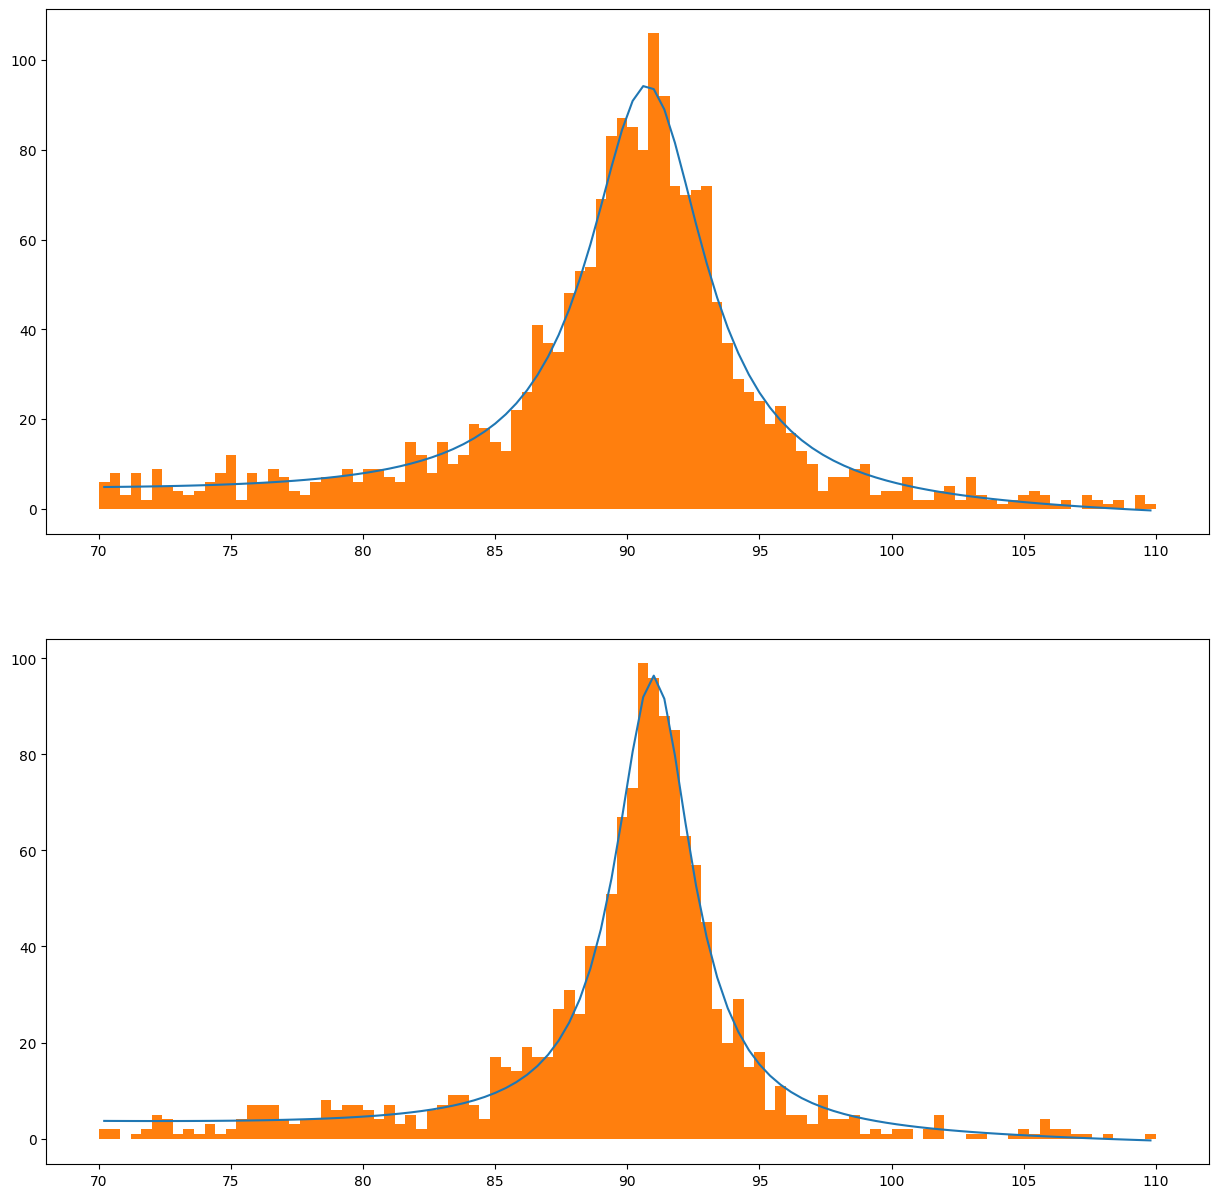

In [8]:
from scipy.optimize import curve_fit

# define parameter accuracy, initial guess and iteration counters
accuracy = 1e-5
p0 = [5, 90, -1, 100, 100]
i_large = 1
i_small = 1
while True: # Loop until large eta parameters are accurate enough
    best_large, covariance_large = curve_fit(breitwigner, bins_large, hist_large, p0=p0)
    error_large = max(abs(p0-best_large))
    if error_large < accuracy: 
        break
    p0 = best_large
    i_large+=1
print("Iterations for large eta:", i_large)
    
while True: # Use large eta parameters as p0 and loop until small eta parameters are accurate enough
    best_small, covariance_small = curve_fit(breitwigner, bins_small, hist_small, p0=p0)
    error_small = max(abs(p0-best_small))
    if error_small < accuracy: 
        break
    p0 = best_small
    i_small+=1
print("Iterations for small eta:", i_small)

# plot both histograms and fitted functions. Also print the optimized parameters and their errors.
f = plt.figure(figsize=(15,15))
plt.subplot(211)
plt.plot(bins_large, breitwigner(np.array(bins_large), *best_large))
plt.hist(inv_mass_large, bins=bins, range=limits)
errors_large = np.sqrt(np.diag(covariance_large))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best_large)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best_large[i],errors_large[i],param_strings[i]))
    
plt.subplot(212)
plt.plot(bins_small, breitwigner(np.array(bins_small), *best_small))
plt.hist(inv_mass_small, bins=bins, range=limits)
errors_small = np.sqrt(np.diag(covariance_small))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best_small)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best_small[i],errors_small[i],param_strings[i]))
plt.show()

In [9]:
def lifetime(decayWidth):
    hbar = 6.582119569e-16/1e9 # GeV*s
    return hbar/decayWidth

# calculate lifetimes and errors for both cases
gamma_large = best_large[0]
error_gamma_large = errors_large[0]
tau_large = lifetime(gamma_large)
tau_minus_large = lifetime(gamma_large-error_gamma_large)
tau_plus_large = lifetime(gamma_large+error_gamma_large)
error_large = max(tau_minus_large-tau_large,tau_large-tau_plus_large)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau_large,error_large))

gamma_small = best_small[0]
error_gamma_small = errors_small[0]
tau_small = lifetime(gamma_small)
tau_minus_small = lifetime(gamma_small-error_gamma_small)
tau_plus_small = lifetime(gamma_small+error_gamma_small)
error_small = max(tau_minus_small-tau_small,tau_small-tau_plus_small)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau_small,error_small))

tau = 1.22061E-25 s +/- 4.47370E-27 s
tau = 1.85864E-25 s +/- 5.61078E-27 s


## Bonus question (no extra points)

The two histograms and the measured quantities show some differences. However, the properties of the Z boson should be the same, regardless of the pseudorapidity values of the two muons. Can you think of any physical reasons why you get different measured values in the two cases?

Hint: Consider the detector architecture of CMS.

In [10]:
# The CMS detector is not identical in the barrel (|η| < 1.3) and the endcap (|η| > 1.3) regions.
# For instance, the tracker subdetector doesn't perform as well in the endcaps. Thus, in general,
# the measurement precision is lower in the endcaps and the measured results are not as accurate there.